---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

ELE0606 - Tópicos especiais em inteligência artificial

Student: Levy Gabriel da Silva Galvão

Título: KNN in the Wine dataset

---

# Libraries import

In [76]:
# Data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Model persistence
from joblib import dump, load

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import StandardScaler, \
                                  MinMaxScaler
from sklearn.metrics import classification_report, \
                            confusion_matrix, \
                            plot_confusion_matrix

# Dataset

The dataset used is the wine dataset. It contains the information about 13 feature attributes that links to three different classes of wine, they are:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline   

Each class has the following number of instances:

- class 1: 59
- class 2: 71
- class 3: 48

Below the data is loaded from the archive website and each column is named according to the attributes names. The full dataset is mantained in one dataframe, but also separeted in a feature dataframe and target series for further use (once the pandas library create those new variables with reference to the data in the original dataframe, problems with double storage will not happen, also this means that any change in the derivated dataframe may influenciate the original dataframe).

In [52]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(filename, header=None)
df.columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
              'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
              'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']
features = np.array(df.drop(columns=['target']))
targets = np.array(df['target'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

# Normalization

Both the `StandardScaler()` and the `MinMaxScaler()` are fitted to the data, so further they can be applied in the feature dataset to transform their range of possible values.

In [40]:
zscore_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

zscore_scaler.fit(features)
minmax_scaler.fit(features)

print(zscore_scaler)
print(minmax_scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)
MinMaxScaler(copy=True, feature_range=(0, 1))


# Sampling

The memory of each class will be iterated over some sample values so the KNN algorithm can be compared according to the dataset size. The function below extract the number of samples in the dataset for each target class offered.

In [60]:
def sample_class(data, n=10, classes=[1, 2, 3]):
  df = pd.DataFrame()
  for i in classes:
    aux = data[data['target']==i].sample(n=n, replace=True)
    df = pd.concat([df, aux])
  df = df.reset_index().drop(columns=['index'])
  X = np.array(df.drop(columns=['target']))
  y = np.array(df['target'])
  return X, y

# Test case

Before the complete simulation, a test case is proposed so the results of a confusion matrix can be better understood. This first simulation will count with the following parameters:

1. Z-score scaler;
2. Random number of neighorbs chosen between `k = [1, 3, 5, 7, 9]` ;
3. Random number of cases chosen between `classes = [10, 20, 30, 40, 50]`;


n_neighbors = 7
sample_size = 10
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        59
           2       1.00      0.85      0.92        71
           3       0.87      1.00      0.93        48

    accuracy                           0.94       178
   macro avg       0.94      0.95      0.94       178
weighted avg       0.94      0.94      0.94       178

[[59  0  0]
 [ 4 60  7]
 [ 0  0 48]]


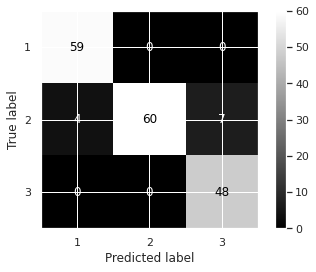

In [75]:
k = [1, 3, 5, 7, 9]
classes = [10, 20, 30, 40, 50]

n_neighbors = random.choice(k)
sample_size = random.choice(classes)

# start pipelines
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', algorithm='brute', metric='euclidean', n_jobs=-1)
zscore_steps = [('scaler', zscore_scaler), ('clf', clf)] 
zscore_pipeline = Pipeline(zscore_steps)

# sample data
X, y = sample_class(df, n=sample_size, classes=np.unique(targets))

# fit data to model pipeline
zscore_pipeline.fit(X, y)
 
# get model metrics
predictions = zscore_pipeline.predict(features)

print('n_neighbors = ' + str(n_neighbors))
print('sample_size = ' + str(sample_size))
print(classification_report(targets, predictions))
print(confusion_matrix(targets, predictions))
plot_confusion_matrix(zscore_pipeline, features, targets, cmap='gray', values_format='d')  
plt.show()

As shown in the results, the number of neighbors used was 7 and wiht 10 samples of each class.

The model show good results with a accuracy of 94% and a confusion matrix with few mispredictions regarding the whole dataset, showing that despite the cache memory of the model using only 10 samples of each class, it has a good generalization property for the entire dataset.

Further in the simulation using mulitple parameters those results might change with new results to discuss.

# Simulation

The main objective of the simulation is to fill two tables with accuracy data regarding multiple case tests for the `k` hyperparameter and the number of cases per class. One table is based in the data scale by the standard scaler and the other by the min-max scaler.

The tables counts with the values of `k = [1, 3, 5, 7, 9]` and `classes = [10, 20, 30, 40, 50]` and are initalized below.

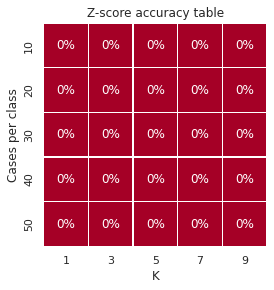

In [82]:
def plot_accuracy_table(table, xticks, yticks, title):
  sns.set(font_scale=1)
  f, heatmap = plt.subplots(figsize=(12/3, 32/3))
  heatmap = sns.heatmap(table, annot=True, fmt=".0%", linewidths=.5, cmap="RdYlGn", cbar=False, square=True)
  heatmap.set_yticklabels(yticks) 
  heatmap.set_xticklabels(xticks)
  plt.ylabel("Cases per class")
  plt.xlabel("K") 
  plt.title(title);

k = [1, 3, 5, 7, 9]
classes = [10, 20, 30, 40, 50]
iterations = 10

zscore_table = np.zeros((len(classes), len(k)))
minmax_table = np.zeros((len(classes), len(k)))

plot_accuracy_table(zscore_table, k, classes, 'Z-score accuracy table')

Below the whole simulation takes place, containg all 10 iterations

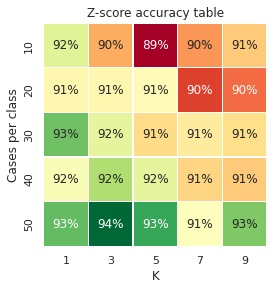

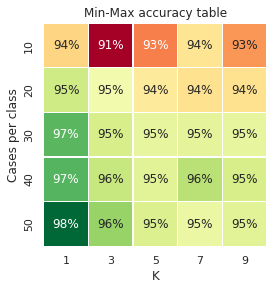

In [83]:
for ii in range(iterations): # 10 iterations
  for jj in range(len(classes)): # number of classes
    for kk in range(len(k)): # number of neighbors
      # re-start pipelines
      clf = KNeighborsClassifier(n_neighbors=k[kk], weights='uniform', algorithm='brute', metric='euclidean', n_jobs=-1)
      zscore_steps = [('scaler', zscore_scaler), ('clf', clf)] 
      minmax_steps = [('scaler', minmax_scaler), ('clf', clf)] 
      zscore_pipeline = Pipeline(zscore_steps)
      minmax_pipeline = Pipeline(minmax_steps)

      # sample data
      X, y = sample_class(df, n=classes[jj], classes=[1,2,3])

      # fit data to model pipeline
      zscore_pipeline.fit(X, y)
      minmax_pipeline.fit(X, y)

      # get model score
      zscore_table[jj, kk] += zscore_pipeline.score(features, targets)/iterations
      minmax_table[jj, kk] += minmax_pipeline.score(features, targets)/iterations


plot_accuracy_table(zscore_table, k, classes, 'Z-score accuracy table')
plot_accuracy_table(minmax_table, k, classes, 'Min-Max accuracy table')

Training the whole batch of hyperparamters have shown increasing good results regarding each choice. 

First comparing the two tables for z-score scaler and the min-max scaler, it is clear that for this dataset the min-max scaler had better results, once comapring the mean value of each table the min-max one has a higher value.

In [86]:
print('Z-score table mean: ' + str(zscore_table.mean()))
print('Min-max table mean: ' + str(minmax_table.mean()))

Z-score table mean: 0.9138202247191011
Min-max table mean: 0.9487865168539327


After, for each table the rising number of cases per class plays a good role in guaranteeing an even higher accuray since this hyperparameters controls the generalization capability of the model. And this spread for each choice of number of neighbors.

This characteristics can be shown as taking the mean value in the horizontal axis for the accuracy tables:

In [102]:
def plot_accuracy_table_axis1(table, yticks, title):
  sns.set(font_scale=1)
  f, heatmap = plt.subplots(figsize=(3, 5))
  heatmap = sns.heatmap(table.reshape(-1,1), annot=True, fmt=".0%", linewidths=.5, cmap="RdYlGn", cbar=False, square=True)
  heatmap.set_yticklabels(yticks) 
  plt.ylabel("Cases per class") 
  plt.title(title);

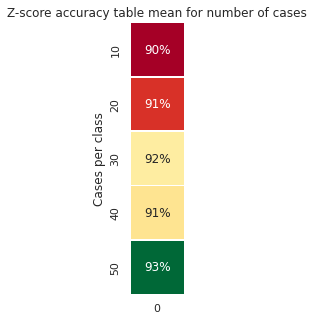

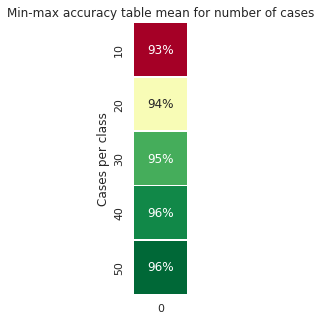

In [104]:
plot_accuracy_table_axis1(zscore_table.mean(axis=1), classes, 'Z-score accuracy table mean for number of cases')
plot_accuracy_table_axis1(minmax_table.mean(axis=1), classes, 'Min-max accuracy table mean for number of cases')



Now comparing only the choice of the number of neighbors as a mean value for all cases per class it shows a slightly better general accuracy trending to lower values of `k = [1, 3, 5]` for this given dataset.

In [110]:
def plot_accuracy_table_axis0(table, xticks, title):
  sns.set(font_scale=1)
  f, heatmap = plt.subplots(figsize=(6, 4))
  heatmap = sns.heatmap(table.reshape(1,-1), annot=True, fmt=".0%", linewidths=.5, cmap="RdYlGn", cbar=False, square=True)
  heatmap.set_xticklabels(xticks) 
  plt.ylabel("K") 
  plt.title(title);

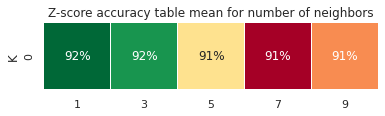

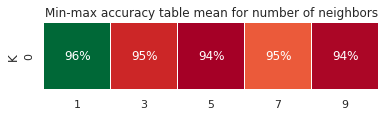

In [111]:
plot_accuracy_table_axis0(zscore_table.mean(axis=0), k, 'Z-score accuracy table mean for number of neighbors')
plot_accuracy_table_axis0(minmax_table.mean(axis=0), k, 'Min-max accuracy table mean for number of neighbors')

Concluding, those results are very important since they show that the choice for the hyperparameters and the amount of samples used influenciate a lot in the model score.